In [28]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_file_path = '/content/drive/My Drive/archive (4).zip'
destination_folder = '/content/Mammals_dataset'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted files to: /content/Mammals_dataset


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,random_split
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [31]:
data_dir='/content/Mammals_dataset/mammals'

In [32]:
data_transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


In [33]:
dataset=datasets.ImageFolder(data_dir,transform=data_transform)

In [34]:
train_size=int(0.8*len(dataset))
test_size=len(dataset)-train_size
train_dataset,test_dataset=random_split(dataset,[train_size,test_size])

In [35]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,shuffle=True,batch_size=32)


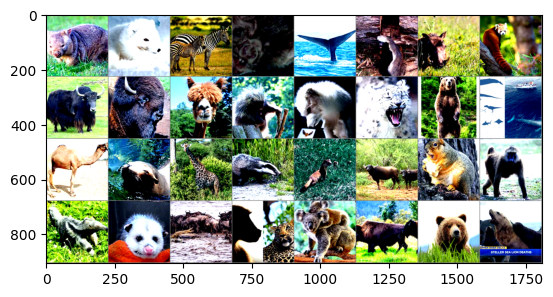

wombat arctic_fox zebra vampire_bat blue_whale badger warthog red_panda yak   american_bison alpaca porcupine arctic_fox snow_leopard brown_bear blue_whale camel sea_lion giraffe badger weasel water_buffalo squirrel baboon anteater opossum wildebeest baboon koala american_bison brown_bear sea_lion


In [36]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()


dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{dataset.classes[labels[j]]:5}' for j in range(32)))



In [37]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [38]:
class_names=dataset.classes
num_classes=len(class_names)

In [39]:
class CustomCNN(nn.Module):
  def __init__(self):
    super(CustomCNN,self).__init__()
    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(128*28*28,512)
    self.fc2=nn.Linear(512,256)
    self.fc3=nn.Linear(256,num_classes)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=x.view(-1,128*28*28)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))

    return x


model=CustomCNN().to(device)

In [40]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [41]:
num_epochs=35
for epoch in range(num_epochs):
  model.train()
  running_loss=0.0
  total=0
  correct=0
  for images,labels in train_loader:
    images=images.to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    _,predicted=torch.max(outputs,1)
    running_loss+=loss.item()
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

  epoch_loss=running_loss/len(train_loader)
  epoch_acc=100*correct/total
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

Epoch [1/35], Loss: 3.7382, Accuracy: 6.24%
Epoch [2/35], Loss: 3.7177, Accuracy: 7.28%
Epoch [3/35], Loss: 3.7120, Accuracy: 6.88%
Epoch [4/35], Loss: 3.6626, Accuracy: 8.92%
Epoch [5/35], Loss: 3.5529, Accuracy: 12.95%
Epoch [6/35], Loss: 3.4175, Accuracy: 17.26%
Epoch [7/35], Loss: 3.2641, Accuracy: 21.00%
Epoch [8/35], Loss: 3.1240, Accuracy: 24.20%
Epoch [9/35], Loss: 2.9790, Accuracy: 26.78%
Epoch [10/35], Loss: 2.8551, Accuracy: 28.92%
Epoch [11/35], Loss: 2.7825, Accuracy: 30.15%
Epoch [12/35], Loss: 2.7220, Accuracy: 31.25%
Epoch [13/35], Loss: 2.6937, Accuracy: 31.48%
Epoch [14/35], Loss: 2.6607, Accuracy: 31.80%
Epoch [15/35], Loss: 2.6471, Accuracy: 31.95%
Epoch [16/35], Loss: 2.6227, Accuracy: 32.44%
Epoch [17/35], Loss: 2.6344, Accuracy: 32.20%
Epoch [18/35], Loss: 2.6211, Accuracy: 32.38%
Epoch [19/35], Loss: 2.6182, Accuracy: 32.52%
Epoch [20/35], Loss: 2.6133, Accuracy: 32.45%
Epoch [21/35], Loss: 2.6074, Accuracy: 32.45%
Epoch [22/35], Loss: 2.6263, Accuracy: 32.49%
E

In [42]:
model.eval()
test_total = 0
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
test_accuracy = 100 * test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 11.12%
